In [2]:
from google.colab import files
uploaded=files.upload()

Saving archive (5).zip to archive (5).zip


data preparation and introduction

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (after downloading 'WA_Fn-UseC_-Telco-Customer-Churn.csv' from Kaggle)
data = pd.read_csv("/content/archive (5).zip")

# Basic info
print(data.shape)
print(data.info())
data.head()


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


handle missing value and duplicate


In [5]:
# Check missing values
print(data.isnull().sum())

# 'TotalCharges' has some missing or blank values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Remove duplicates
data = data.drop_duplicates()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-1245260937.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


define target and predictors

In [6]:
# Convert target to binary
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
X = data.drop('Churn', axis=1)
y = data['Churn']


encode categorical variables


In [7]:
X = pd.get_dummies(X, drop_first=True)


EDA

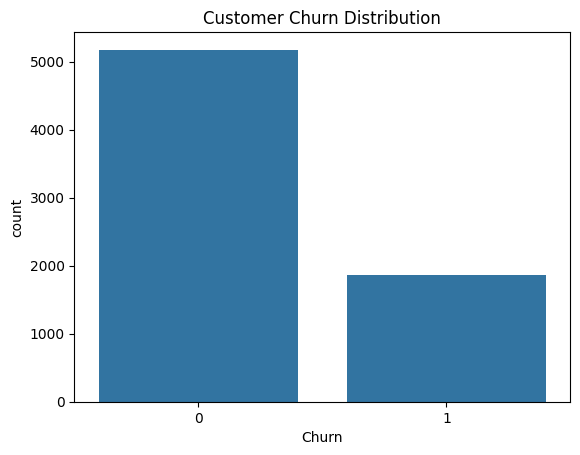

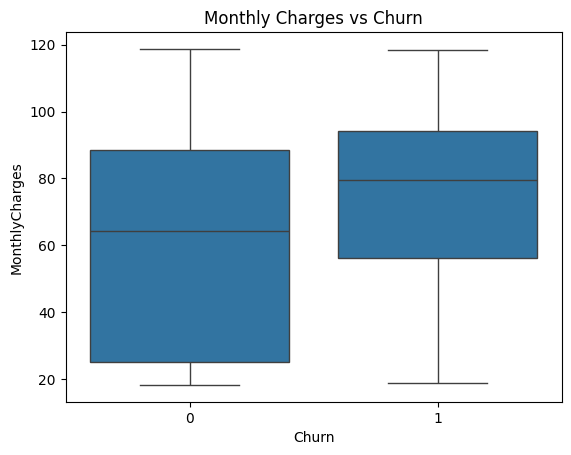

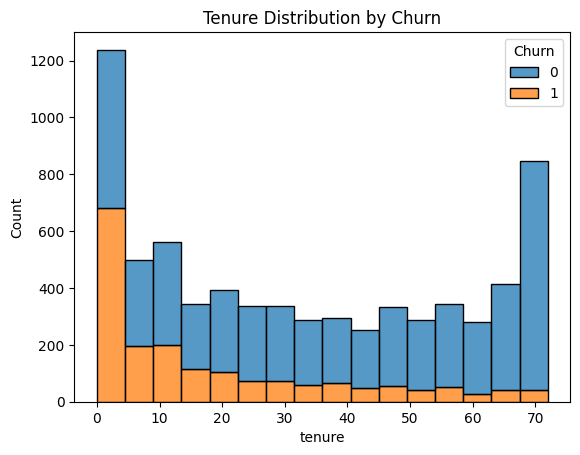

In [8]:
# Churn distribution
sns.countplot(x='Churn', data=data)
plt.title("Customer Churn Distribution")
plt.show()

# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

# Tenure vs Churn
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack')
plt.title("Tenure Distribution by Churn")
plt.show()


Model Development and Rule Induction using CHAID

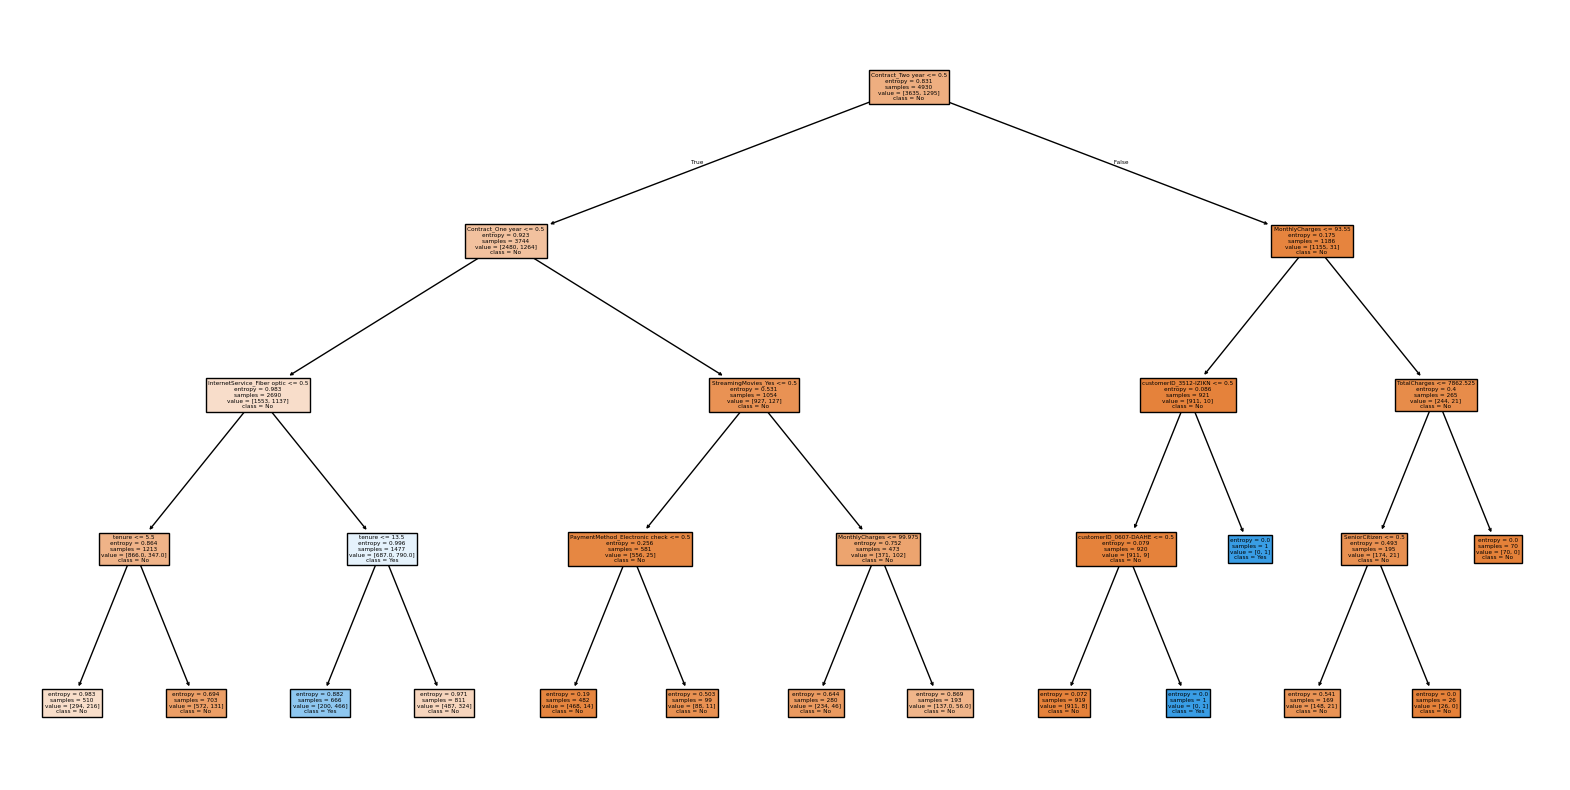

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

chaid_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
chaid_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(chaid_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


Model Comparison and Evaluation (CHAID vs Logistic Regression)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CHAID Accuracy: 0.7856128726928537
Logistic Regression Accuracy: 0.804070042593469
CHAID AUC: 0.8238969148254558
Logistic AUC: 0.8528661310004914


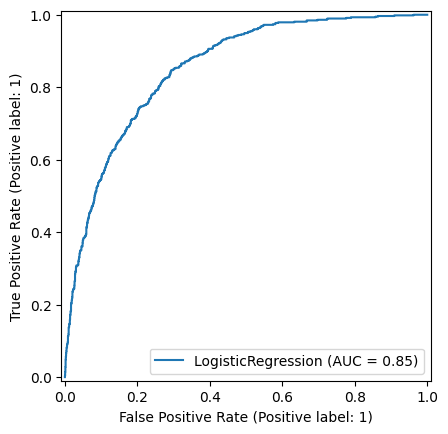

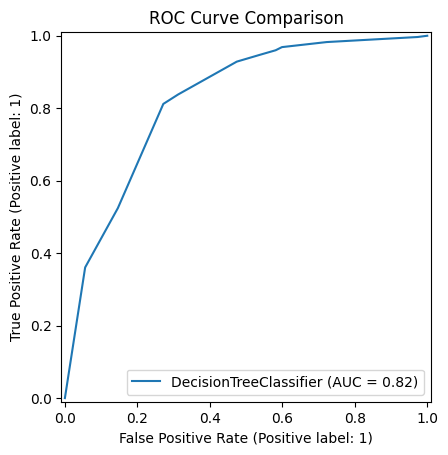

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_tree = chaid_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

# Accuracy
print("CHAID Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# ROC-AUC comparison
print("CHAID AUC:", roc_auc_score(y_test, chaid_model.predict_proba(X_test)[:,1]))
print("Logistic AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))

# ROC Curve
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
RocCurveDisplay.from_estimator(chaid_model, X_test, y_test)
plt.title("ROC Curve Comparison")
plt.show()


Model Deployment and Updating

In [11]:
import joblib

# Save models
joblib.dump(log_model, 'logistic_churn.pkl')
joblib.dump(chaid_model, 'chaid_churn.pkl')

# Load and test
loaded_model = joblib.load('logistic_churn.pkl')
print("Loaded Model Test Accuracy:", loaded_model.score(X_test, y_test))


Loaded Model Test Accuracy: 0.804070042593469


Model Updating (Future Data)

In [12]:
# Example new batch
new_data = X_test.sample(10)
new_preds = loaded_model.predict(new_data)
print(new_preds)


[1 0 0 0 0 0 0 0 0 0]
